# Quick Sort

In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline

In [2]:
def quicksort(L, first, last):
    i = first
    j = last    
    pivote = (L[i] + L[j]) / 2
    while i < j:
        while L[i] < pivote:
            i+=1
        while L[j] > pivote:
            j-=1
        if i <= j:
            x = L[j]
            L[j] = L[i]
            L[i] = x
            i+=1
            j-=1
    if first < j:
        L = quicksort(L, first, j)
    if last > i:
        L = quicksort(L, i, last)
    return L

In [3]:
A= np.random.permutation(range(0,10))
print A
quicksort(A,0,len(A)-1)
print A

[0 2 1 6 9 5 7 4 3 8]
[0 1 2 3 4 5 6 7 8 9]


# Correctitud

# Análisis del tiempo de ejecución

In [4]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        

In [5]:
def acct_quicksort(L, first, last, acct):
    i = first; acct.count()
    j = last; acct.count()     
    pivote = (L[i] + L[j]) / 2; acct.count()

    while i < j:
        acct.count()
        while L[i] < pivote:
            acct.count()
            i+=1; acct.count()
        while L[j] > pivote:
            acct.count()
            j-=1;acct.count()
        if i <= j:
            acct.count()
            x = L[j]; acct.count()
            L[j] = L[i]; acct.count()
            L[i] = x; acct.count()
            i+=1; acct.count()
            j-=1; acct.count()
            
    if first < j:    
        acct.count()
        L = acct_quicksort(L, first, j,acct);acct.count()
    if last > i:
        acct.count()
        L = acct_quicksort(L, i, last,acct);acct.count()
    return L

In [6]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_quicksort(B,0,len(B)-1, acct) 
acct.print_steps()

Number of steps = 144


In [7]:
def T(n):
    return n*n

# Análisis Experimental

In [8]:
def exper_analysisS(n):
    results = []
    acct = Counter()
    for i in range(n):
        l=0
        if i>0 :
            l = range(i)
            rnd.shuffle(l)
            A =list(l)
            acct.reset()
            acct_quicksort(A,0,len(A)-1, acct)
        results.append(acct.steps)
    return results

In [9]:
def exper_analysisT(n):
    results = []
    for i in range(n):
        t = 0
        if i > 0 :
            l = range(i)
            rnd.shuffle(l)
            A =list(l)
            tic = time.clock()
            quicksort(A,0,len(A)-1)
            toc = time.clock()
            t = (toc-tic)*5000000
        results.append(t)
    return results

In [10]:
def exper_analysisR(n):
    results = []
    acct = Counter()
    for i in range(n):
        l=0
        if i > 1:
            l = i * i
        results.append(l)
    return results

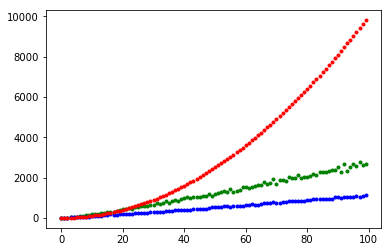

In [11]:
pl.clf()
x = np.arange(100)
y1 = np.array(exper_analysisS(100))
y2= np.array(exper_analysisT(100))
y3 = np.array(exper_analysisR(100))
pl.plot(x, y1, 'g.', x, y2, 'b.', x, y3, 'r.')